## Dealing with Drift

We will be attempting to see if intelligence and higher income have any correlation. Let us start with our imports and loading our dataset.

In [1]:
import pandas as pd

In [2]:
incomeintel = pd.read_csv('IncomeIntel.txt')

In [3]:
incomeintel

,grad_year,gre_qnt,salary_p4
0,2001.0,739.737072,67400.475185
1,2001.0,721.811673,67600.584142
2,2001.0,736.277908,58704.880589
3,2001.0,770.498485,64707.290345
4,2001.0,735.002861,51737.324165
5,2001.0,763.876037,64010.822579
6,2001.0,738.758659,60080.107481
7,2001.0,706.407471,56263.309815
8,2001.0,705.886037,62109.859243
9,2001.0,700.971986,50189.704747


Now that we have our data loaded up let us the Statsmodel for our OLS model. It allows for more information about the model unlike our previously used scikit-learn model.

In [4]:
import statsmodels.api as sm

y, X = incomeintel['salary_p4'], incomeintel['gre_qnt']
X = sm.add_constant(X, prepend=False)

ols = sm.OLS(y, X)
ols_result = ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              salary_p4   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     356.3
Date:                Tue, 16 Oct 2018   Prob (F-statistic):           3.43e-68
Time:                        20:45:05   Log-Likelihood:                -10673.
No. Observations:                1000   AIC:                         2.135e+04
Df Residuals:                     998   BIC:                         2.136e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gre_qnt      -25.7632      1.365    -18.875      0.000     -28.442     -23.085
const       8.954e+04    878.764    101.895      0.000    8.78e+04    9.13e+04
==============================================================================
Omnibus:                        9.118   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.100
Skew:                           0.230   Prob(JB):                       0.0106
Kurtosis:                       3.077   Cond. No.                     1.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The coefficient is 103.0949 and the standard error is 1.733. We can see the rest of the results of the OLS when we run the `ols.summary()` function. The result is significant. The coefficient is -25.7632 and the standard error is 1.365.
We will now plot the data on a a scatterplot. We'll be using the standard scatter method which `pandas` provides us.

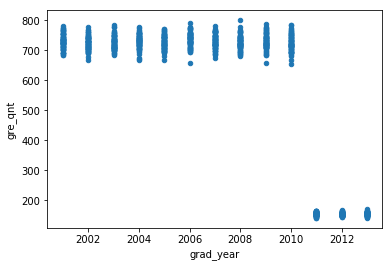

In [5]:
incomeintel.plot.scatter(x='grad_year', y='gre_qnt')

We can see a clear problem come up - in 2011 the scoring system for the GRE changed. A score of 750 doesn't even exist post 2011! For us to have any kind of meaningful analysis we must scale these values.

The ideal way to scale these values would be to have the percentile values for each of the observations, and report all the scores as percentiles. The GRE website also gives us a convertion rate which we can use, which should also give us acceptable results. What we will resort to is simply scale the values, by multiplying all the values post 2011 with 800/170. We would like to stress that this is not an ideal approach, but will suffice to go through this experiment.

In [6]:
incomeintel.loc[incomeintel.grad_year > 2011, 'gre_qnt'] = incomeintel.loc[incomeintel.grad_year > 2011, 'gre_qnt'] * (800/170)

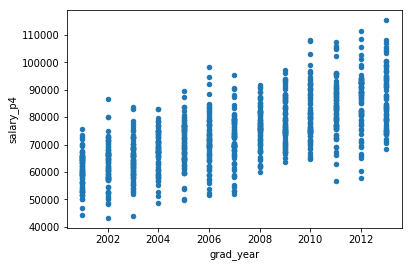

In [7]:
incomeintel.plot.scatter(x='grad_year', y='salary_p4')

We can see a trend here - with increasing year, there is an increase in the salary. This might effect our results, and we would need to detrend our data. Because it is not panel data, we cannot use differencing or log differencing methods. We can attempt to fix this instead by finding the average increase per year to find the average growth rate. We then adjust by dividing all the salaries by `(1 + avg_growth_rate) ** (grad_year - 2001)`. This will not affect the first year, but adjust the rest of the years. We add a new column called `adjusted_salary` to store these new values.

In [8]:
avg_inc_by_year = incomeintel['salary_p4'].groupby(incomeintel['grad_year']).mean().values


In [9]:
avg_growth_rate = ((avg_inc_by_year[1:] - avg_inc_by_year[:-1]) / avg_inc_by_year[:-1]).mean()


In [10]:
incomeintel['adjusted_salary'] = incomeintel['salary_p4'] / ((1 + avg_growth_rate) ** (incomeintel['grad_year'] - 2001))

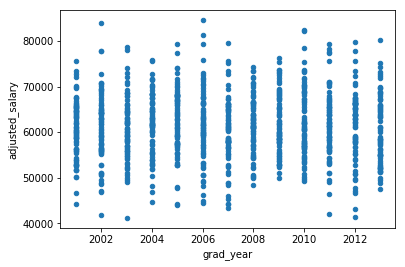

In [11]:
incomeintel.plot.scatter(x='grad_year', y='adjusted_salary')

We've now adjusted our salary, and also adjusted for the GRE scores which have changed. Let us now try and train another model which can better represent our question!

In [12]:
y, X = incomeintel['adjusted_salary'], incomeintel['gre_qnt']

X = sm.add_constant(X, prepend=False)

newols = sm.OLS(y, X)
newols_result = newols.fit()
newols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        adjusted_salary   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1814
Date:                Tue, 16 Oct 2018   Prob (F-statistic):              0.670
Time:                        20:45:06   Log-Likelihood:                -10291.
No. Observations:                1000   AIC:                         2.059e+04
Df Residuals:                     998   BIC:                         2.060e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gre_qnt       -0.6217      1.460     -0.426      0.670      -3.486       2.242
const       6.185e+04   1024.106     60.390      0.000    5.98e+04    6.39e+04
==============================================================================
Omnibus:                        0.758   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.685   Jarque-Bera (JB):                0.672
Skew:                           0.059   Prob(JB):                        0.715
Kurtosis:                       3.046   Cond. No.                     3.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After we adjust for time drift and fix the GRE scores, we get a coefficient of -0.6217, and standard error of 1.460, and we can see that the result is not significant. This means that GRE quant scores doesn't really account for your salary. This is a very important example of how we need to carefully examine our data and the nature of our data before we proceed with any analysis!